## Fake News Detection Project - Classification of news to check if a news article is Fake or not
## COMP 840/COMP740: ML Applications/Tools (Fall 2020)
## Author - Aashirya Kaushik
## Date - 11/16/2020


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### Reading the datasets

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

### Data Cleaning

In [5]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
#check data
data.head()


,title,text,subject,date,target
0,HILARIOUS! VIDEO Shows Pattern Of CNN Cutting ...,,politics,"Mar 12, 2017",fake
1,Rights watchers slam Myanmar's ban on protests...,YANGON (Reuters) - Human rights monitors on We...,worldnews,"November 15, 2017",true
2,Sanders disappointed after Trump pulls out of ...,WASHINGTON (Reuters) - U.S. Democratic preside...,politicsNews,"May 27, 2016",true
3,DEMOCRATS EAT THEIR OWN: Secret Service Protec...,It s really quite ironic that the guy who has ...,left-news,"May 31, 2016",fake
4,China's Xi fetes Trump on first day of Beijing...,BEIJING (Reuters) - With lavish pageantry and ...,worldnews,"November 8, 2017",true


In [9]:
#Removing the unnecessary data i.e the data we will not be using for analysis
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,HILARIOUS! VIDEO Shows Pattern Of CNN Cutting ...,,politics,fake
1,Rights watchers slam Myanmar's ban on protests...,YANGON (Reuters) - Human rights monitors on We...,worldnews,true
2,Sanders disappointed after Trump pulls out of ...,WASHINGTON (Reuters) - U.S. Democratic preside...,politicsNews,true
3,DEMOCRATS EAT THEIR OWN: Secret Service Protec...,It s really quite ironic that the guy who has ...,left-news,fake
4,China's Xi fetes Trump on first day of Beijing...,BEIJING (Reuters) - With lavish pageantry and ...,worldnews,true


In [10]:
# Removing the title because we will only use the text
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,,politics,fake
1,YANGON (Reuters) - Human rights monitors on We...,worldnews,true
2,WASHINGTON (Reuters) - U.S. Democratic preside...,politicsNews,true
3,It s really quite ironic that the guy who has ...,left-news,fake
4,BEIJING (Reuters) - With lavish pageantry and ...,worldnews,true


In [11]:
# Converting to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,,politics,fake
1,yangon (reuters) - human rights monitors on we...,worldnews,true
2,washington (reuters) - u.s. democratic preside...,politicsNews,true
3,it s really quite ironic that the guy who has ...,left-news,fake
4,beijing (reuters) - with lavish pageantry and ...,worldnews,true


In [12]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aashiryakaushik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
data.head()


,text,subject,target
0,,politics,fake
1,yangon (reuters) - human rights monitors wedne...,worldnews,true
2,washington (reuters) - u.s. democratic preside...,politicsNews,true
3,really quite ironic guy paid non-paid proteste...,left-news,fake
4,beijing (reuters) - lavish pageantry uncharact...,worldnews,true


### Data exploration

In [14]:
data.info

<bound method DataFrame.info of                                                     text       subject target
0                                                             politics   fake
1      yangon (reuters) - human rights monitors wedne...     worldnews   true
2      washington (reuters) - u.s. democratic preside...  politicsNews   true
3      really quite ironic guy paid non-paid proteste...     left-news   fake
4      beijing (reuters) - lavish pageantry uncharact...     worldnews   true
...                                                  ...           ...    ...
44893  scene movie killing europe :terrorist attacks,...      politics   fake
44894  (reuters) - highlights u.s. president donald t...  politicsNews   true
44895  discussion sexual harassment charges fox news ...      politics   fake
44896  trump administration preparing redirect resour...     left-news   fake
44897  sort unbelievable wealthiest person presidenti...          News   fake

[44898 rows x 3 columns]>

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


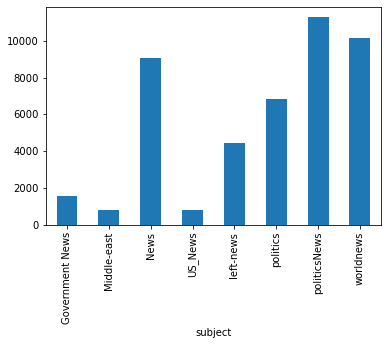

In [15]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


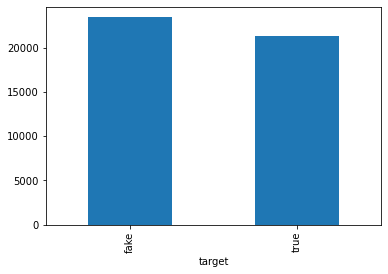

In [16]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

### Modeling

In [17]:
#Preparing the data : Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

### LOGISTIC REGRESSION

In [18]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

In [19]:
# Fitting the model
model = pipe.fit(X_train, y_train)

In [20]:
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.8%


### DECISION TREE CLASSIFIER

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

In [22]:
# Fitting the model
model = pipe.fit(X_train, y_train)

In [23]:
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.6%


RANDOM FOREST CLASSIFIER

In [24]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

In [25]:
# Fitting the model
model = pipe.fit(X_train, y_train)

In [26]:
#Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.33%
